In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as imread
import os 

Setting the directory of test and train images

In [4]:
test_path = 'cell_images/test/'
train_path = 'cell_images/train/'

In [5]:
import tensorflow
print(tensorflow.__version__)

2.8.0


In [6]:
from IPython.display import clear_output

from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization ,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
image_size = (130, 130) #Image size

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, # Shift the pic width by a max of 5%
    height_shift_range=0.10, # Shift the pic height by a max of 5%
    rescale=1/255, # Rescale the image by normalzing it.
    shear_range=0.1, # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1, # Zoom in by 10% max
    horizontal_flip=True, # Allo horizontal flipping
    fill_mode='nearest' # Fill in missing pixels with the nearest filled value
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=16,
    color_mode='rgb',
    class_mode='binary'
)

validation_gen = datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=16,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [10]:
train_gen.class_indices   #Lables

{'Parasite': 0, 'Uninfected': 1}

In [11]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
        

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('Log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="acc")
        ax2.plot(self.x, self.val_acc, label="val_acc")
        ax2.legend()
        
        plt.show()
        
        
plot = PlotLearning()

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()  # Summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

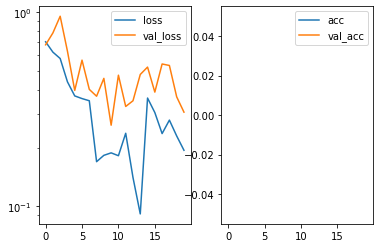

26/26 [==============================] - 10s 379ms/step - loss: 0.1948 - accuracy: 0.9327 - val_loss: 0.3062 - val_accuracy: 0.8657


In [14]:
model.fit_generator(train_gen, epochs=20, callbacks=[plot], validation_data=validation_gen)

In [15]:
model.save('malariaModel.h5')

In [16]:
model.evaluate_generator(validation_gen)

C:\Users\rajni\AppData\Local\Temp/ipykernel_10644/1982735046.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_gen)


[0.3091910779476166, 0.858208954334259]

In [17]:
model.metrics_names

['loss', 'accuracy']

In [20]:
print (train_gen.class_indices)

labels = '\n'.join(sorted(train_gen.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Parasite': 0, 'Uninfected': 1}


dir_path="C:/Users/rajni/Desktop/base_data/Test"

In [22]:
dir_path="C:/Users/rajni/Desktop/base_data/Test"

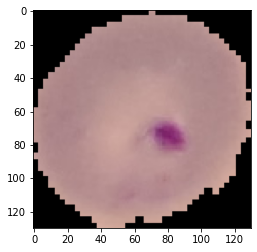

Parasite


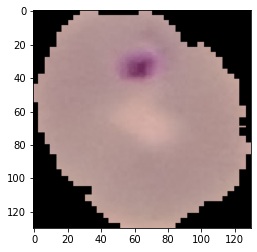

Parasite


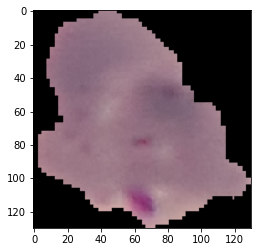

Parasite


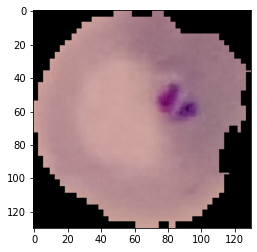

Parasite


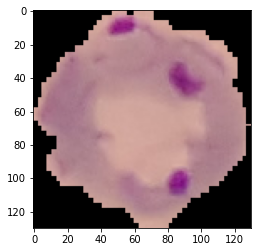

Parasite


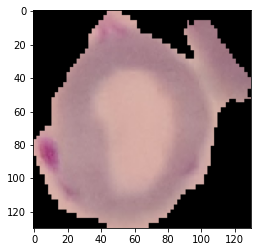

Parasite


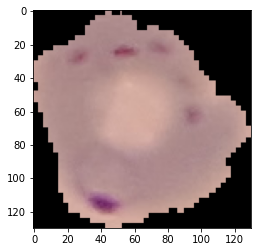

Parasite


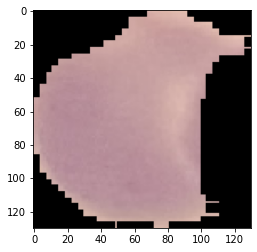

Non Parasite


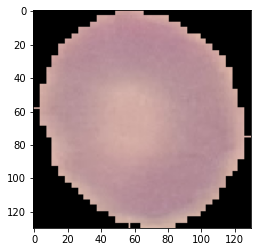

Non Parasite


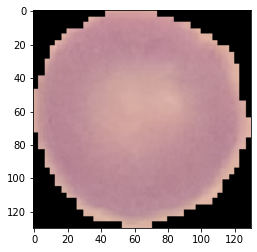

Non Parasite


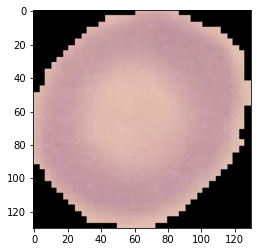

Non Parasite


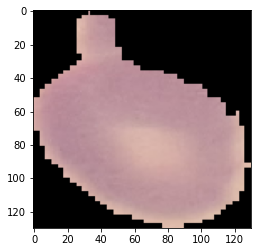

Non Parasite


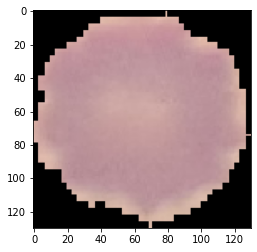

Non Parasite


In [29]:
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(130,130))
    plt.imshow(img)
    plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0 )
    images=np.vstack([x])

    abc=model.predict(images)
    if abc==0:
        print("Parasite")
    else:
        print("Non Parasite")



# Exporting the lables.txt file

In [21]:
model.save('saved_model_dir')
converter = tensorflow.lite.TFLiteConverter.from_saved_model('saved_model_dir')
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: saved_model_dir\assets


6652452